# Коллекции 2: генераторы, множества и словари 

В этом ноутбуке рассмотрим дополнительные структуры данных в Python: множества (sets) и словари (dicts). Также дополнительно посмотрим на способ сокращения кода в виде списочных выражений и генераторов, а также бегло взглянем на библиотеку `itertools`.

## Порядок работы с ноутбуком

Внимательно прочтите содержимое ячеек сверху вниз. Перед выполнением ячейки с кодом попробуйте заранее предугадать, что она выведет, а затем проверить себя. Внимательно изучите вывод каждой ячейки (или ошибку, которую она выводит). Если в ячейке есть ввод данных пользователем и ветвление, разными вводами добейтесь всех возможных выводов. Не бойтесь экспериментировать и пробовать "поломать" содержимое ячейки, проверив код на прочность — через такие эксперименты проще понять, что делать можно, а что нельзя.

В конце этого и каждого последующего ноутбука находятся упражнения для самостоятельного решения. Вы можете переходить сразу к ним, если знаете про все перечисленные ниже

## Ключевые понятия:
- Множества, их особенности и способы задания
- Операции над множествами
- Сравнение множеств
- Словари, их особенности и способы задания
- Три способа перебора словаря
- Списочные выражения
- Генераторы и итерируемые объекты
- Функции `product()` и `combinations()` из библиотеки `itertools`

## Множества

Ещё один вид коллекции — это **множество** (set). В отличие от других коллекций:
* множество является **неупорядоченной изменяемой коллекцией**, элементы в множестве не имеют индексов или каких-либо других порядковых номеров;
* каждый элемент в множестве **уникален**, один и тот же элемент не может присутствовать в множестве дважды.

Второе свойство позволяет использовать множества для подсчета уникальных элементов в других коллекциях, типа строк или списков. Также над множествами можно производить любые теоретико-множественные операции, типа объединения, пересечения и т.д.

Создать множество можно с помощью фигурных скобок или функции `set()`, которая позволяет превратить любую коллекцию в множество:

In [ ]:
a = {'а', 'о', 'у', 'ы', 'э'}
b = set("Привет, мир!")
print(a)
print(b) # порядок вывода символов в множестве не определен

Множество может быть однородным, то есть состоять из элементов одного типа, так и содержать элементы разных типов. При этом поддерживаются только **неизменяемые** типы данных:

In [ ]:
a = {(2, 1), (3, 5), (2, 1)} # однородное множество
b = (2, 'a', ('str', True)) # неоднородное

In [ ]:
c = {5, 6, {4, 8}} # ошибка TypeError — множество изменяемое и не хэшируется, то есть не занимает постоянный участок памяти

In [ ]:
d = {[5, 6], [7, 8]} # тоже ошибка TypeError, аналогично для списков

Множества поддерживают следующие операции из уже известных:

| Метод (коллекция не меняется)| Описание                                                                    | Пример (показывается вывод)         |
|------------------------------|-----------------------------------------------------------------------------|-------------------------------------|
| `x in s`                     | Проверка вхождения элемента `x` в коллекцию `s`                             | `5 in {3, 6, 5}` → `True`           |
| `x not in s`                 | Проверка отсутствия элемента `x` в коллекции `s`                            | `5 not in {3, 6, 5}` → `False`      |
| `len(s)`                     | Вернуть количество элементов в коллекции `s`                                | `len({0, 5, 3, 1})` → `4`           |
| `min(s)`                     | Вернуть наименьший элемент в коллекции `s` (только для однородных множеств) | `min({0, 5, 3, 1})` → `0`           |
| `max(s)`                     | Вернуть наибольший элемент в коллекции `s` (только для однородных множеств) | `max({'a', 'b', 'd', 'c'})` → `'d'` |
| `s.copy()`                   | Вернуть копию коллекции                                                     | `{1, 2, 3}.copy()` → `{1, 2, 3}`    |

| Метод (изменяет множество)       | Описание                                                                   | Пример (показывается содержание множества) |
|-------------------------------|----------------------------------------------------------------------------|-----------------------------------------|
| `s.add(x)`                    | Добавить `x` в множество                                            | `{1, 2}.add(3)` → `{1, 2, 3}`           |
| `s.remove(x)`                 | Убрать элемент `x` из множества; если такого нет, вернуть KeyError  | `{1, 2, 3}.remove(2)` → `{1, 3}`        |
| `s.discard(x)`                | Убрать элемент `x` из множества, если такой есть                    | `{1, 2, 3}.remove(2)` → `{1, 3}`        |
| `s.pop()`                     | Убрать случайный элемент из множества `s` и вернуть его             | `{1, 2, 3}.pop()` →  `{2, 3}`        |
| `s.clear()`                   | Очистить множество                                                  | `{1, 2, 3}.clear()` → `{}`              |

Несмотря на отсутствие упорядоченности, ничего не мешает вам перебрать множество в цикле `for`. Но учтите, что порядок от запуска к запуску может поменяться!

In [ ]:
vowels = {'а', 'я', 'о', 'ё', 'у', 'ю', 'э', 'е', 'ы'}
for vowel in vowels:
    print(f"Буква {vowel} имеет номер {ord(vowel)} в таблице символов")

## Операции над множествами
### Пересечение
Пересечение двух множеств задает множество из элементов, **общих** для этих множеств. В Python обозначается операцией `&` или методом `.intersection()`:

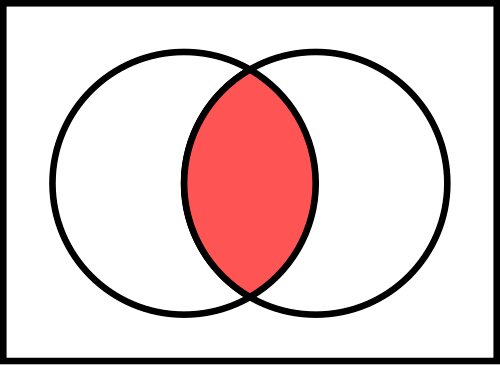

Найдем, какие числа и простые, и четные. Перед запуском ячейки ниже предскажите заранее, какие элементы выведутся:

In [ ]:
a = {2, 3, 5, 7, 11, 13} # простые числа
b = {0, 2, 4, 6, 8, 10, 12} # четные числа
print(a & b)
print(a.intersection(b))

### Объединение
Объединение двух множеств задает множество из **всех** элементов этих множеств. В Python обозначается операцией `|` или методом `.union()`:

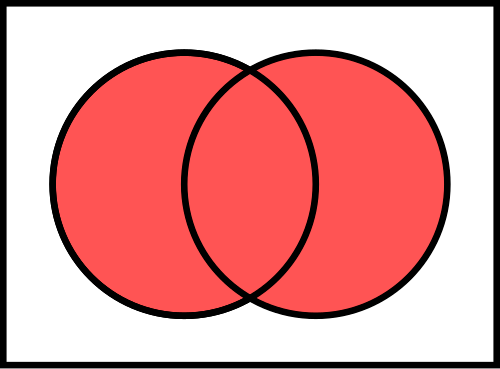

Найдем, какие у нас общие друзья и сколько. Перед запуском ячейки ниже предскажите заранее, какие элементы выведутся:

In [ ]:
my_friends = set(["Петя", "Леша", "Вася"]) 
your_friends = set(["Игорь", "Леша", "Петя", "Женя"])
our_friends = my_friends | your_friends
print(our_friends)
our_friends = my_friends.union(your_friends)
print(our_friends)

### Разность
Разность двух множеств задает множество из элементов первого множества, которые не входят во второе множество. В Python обозначается операцией `-` или методом `.difference()`:

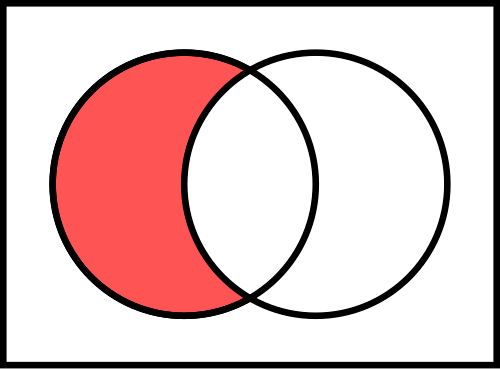

Найдем, что такое Земля (`earth`) без искусства (`art`). Перед запуском ячейки ниже предскажите заранее, какие элементы выведутся:

In [ ]:
a = set("earth")
b = set("art")
print(a - b)
print(a.difference(b))

### Симметрическая разность
Симметрическая разность двух множеств задает множество из **всех** элементов этих множеств, которые не входят сразу в оба. В Python обозначается операцией `^` или методом `symmetric_difference()`:

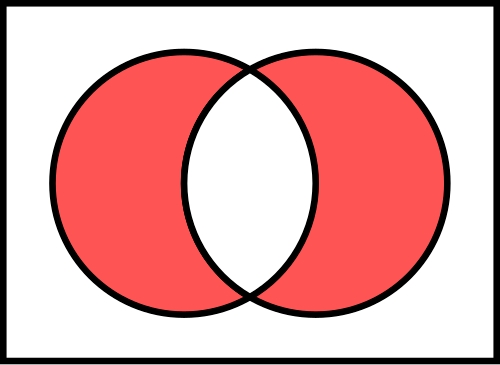

Найдем, какие друзья не дружат сразу с нами обоими. Перед запуском ячейки ниже предскажите заранее, какие элементы выведутся:

In [ ]:
my_friends = set(["Петя", "Леша", "Вася"]) 
your_friends = set(["Игорь", "Леша", "Петя", "Женя"])
our_unmutual_friends = my_friends ^ your_friends
print(our_unmutual_friends)
our_unmutual_friends = my_friends.symmetric_difference(your_friends)
print(our_unmutual_friends)

## Сравнение множеств

На множествах определены операции проверки равенства `==`, вхождения `<=` и содержания `>=`. Они принимают значение `True` тогда и только тогда, когда оба множества совпадают друг с другом, первое входит во второе, и первое содержит второе, соответственно:

In [ ]:
a = set('эй жлоб где туз прячь юных съёмщиц в шкаф')
b = set('съешь же ещё этих мягких французских булок да выпей чаю')
c = set('абвгдеёжзийклмнопрстуфхцчшщъыьэюя')
if c <= a:
    print("Весь алфавит входит в первую строку")
if b >= c:
    print("Вторая строка содержит в себе весь алфавит")
if a == b:
    print("И оба множества равны друг другу!") # следует ли из этого, что a == c и b == c истинны?

## Словари

В списках, строках и кортежах упорядочивание элементов ведется по номерам-индексам. А если мы хотим вместо номеров использовать другой **неизменяемый** тип, вроде строки или кортежа?

Тут пригождаются **словари** (dictionaries). Это **упорядоченный изменяемый** тип данных, который соединяет две коллекции: ключи и значения. С помощью этого типа данных можно вызывать любое значение по соответствующему ключу, указанному в квадратных скобках (как индекс у списков, кортежей и строк).

В качестве ключей могут быть только неизменяемые типы данных (`int`, `float`, `str`, `tuple`), в качестве значений — какие угодно.

Задать словарь можно с помощью фигурных скобок с парами вида `ключ: значение` внутри, перечисленными через запятую, либо через функцию-конструктор `dict()`:

In [ ]:
alphas = {"UMa": "Дубхе", "Gem": "Кастор", 'UMi': "Полярная"}

stars = dict([("G2V", "Солнце"), ("M2I", "Бетельгейзе")])
print(alphas['Gem'])
print(stars['M2I'])

Создание новых пар `key: value` в словаре `d` можно осуществлять с помощью оператора присваивания в виде `d[key] = value`:

In [ ]:
alphas = {"UMa": "Дубхе", "Gem": "Кастор", 'UMi': "Полярная"}

alphas['Ori'] = 'Бетельгейзе'
alphas

Словари поддерживают следующие операции из уже известных:

| Метод (словарь не меняется)| Описание                                                                    | Пример (показывается вывод)         |
|------------------------------|-----------------------------------------------------------------------------|-------------------------------------|
| `key in d`                   | Проверка вхождения **ключа** `key` в словарь `d`                            | `a in {'a': 6, 'b': 7}` → `True`           |
| `del d[key]`                 | Удалить ключ `key` из словаря `d`                                      | `d = {'a': 6, 'b': 7}; del d['a']` → `{'b': 7}` |
| `len(d)`                     | Вернуть количество ключей в словаре `d`                                | `len({'a': 6, 'b': 7})` → `4`           |
| `min(d)`                     | Вернуть наименьший элемент среди ключей `d` (только для однородных ключей) | `min({'a': 6, 'b': 7})` → `a`           |
| `max(d)`                     | Вернуть наибольший элемент среди ключей `d` (только для однородных ключей) | `max({'a', 'b', 'd', 'c'})` → `'b'` |
| `d.copy()`                   | Вернуть копию словаря                                                     | `{'a': 6, 'b': 7}.copy()` → `{'a': 6, 'b': 7}`    |

Старые знакомые `d.clear()` очищает словарь `d`:

In [ ]:
stars = {"UMa": "Дубхе", "Gem": "Кастор", 'UMi': "Полярная"}
stars.clear()
print(stars)

А `d.pop(key, default)` возвращает значение по ключу `key` и убирает его из словаря. Если такого ключа нет, вернется значение `default`, по-умолчанию равное пустоте `None`:

In [ ]:
stars = {"UMa": "Дубхе", "Gem": "Кастор", 'UMi': "Полярная"}
print(stars.pop('Gem', 'Нет такого созвездия в словаре'))
print(stars)

`d.get(key, default)` просто возвращает значение по ключу `key`. Если такого ключа нет, вернется значение `default`, по-умолчанию равное пустоте `None`:

In [ ]:
stars = {"UMa": "Дубхе", "Gem": "Кастор", 'UMi': "Полярная"}
stars.get('Gem', 'Нет такого созвездия в словаре')
print(stars)

Перебирать словари можно как минимум тремя различными способами. С помощью методов `d.keys()` и `d.values()` можно получить коллекции из ключей и значений словаря `d`, соответственно, а пары вида `(ключ, значение)` могут быть вызваны с помощью метода `d.items()`: 

In [ ]:
stars = {"UMa": "Дубхе", "Gem": "Кастор", 'UMi': "Полярная"}

for const in stars:     # перебор по ключам в словаре
    print(const, stars[const], end=' ') # вывод ключа и значения по ключу
print('')
for const in stars.keys(): # аналогично, перебор по ключам в словаре
    print(const, stars[const], end=' ') # вывод ключа и значения по ключу
print('')
for const, star in stars.items(): # перебор по парам ключ-значение, множественное присваивание!
    print(const, star, end=' ') # вывод ключа и значения из пары
print('')
for star in stars.values(): # перебор по значениям
    print(star, end=' ') # вывод значений по ключу, тут уже так просто к ключу и не обратиться

## Списочные выражения

В Python есть способ упростить программисту создание и обработку списков с помощью **списочных выражений** (list comprehensions). 

Списочные выражения позволяют поместить цикл «внутрь» списка.

Положим, что нам нужно считать у пользователя 5 чисел. Сравните две ячейки снизу, выполняющие одно и то же действие:

In [ ]:
numbers = []
for i in range(5):
    numbers.append(int(input()))
print(numbers)

In [ ]:
numbers = [int(input()) for i in range(5)]
print(numbers)

Внутрь списочного выражения можно поместить условную конструкцию. Положим, нам нужно взять предыдущий список, заданный пользователем, оставить в нем четные числа, а все нечетные заменить на ноль. С помощью списочных выражений это делается так:

In [ ]:
numbers_two = [i if (i % 2 == 0) else 0 for i in numbers]
numbers_two

Ничего не мешает создавать дву- и более мерные списки с помощью таких конструкций:

In [ ]:
table = [[i * j for j in range(1, 5)] for i in range(1, 5)] # таблица умножения 4x4
print(table)

## Генераторы и итерируемые объекты

При создании списочного выражения можно заменить квадратные скобки на круглые, получив **генератор**. Его отличие заключается в его **ленивости**: он не вычисляется сразу, заполняя память, а дожидается его использования в каком-нибудь цикле, либо же превращения в список функцией `list()`. При этом, генератор не индексируется. Модернизируем наш исходный пример:

In [ ]:
numbers = (10 ** i for i in range(100))
print(numbers) # выведется особый тип объекта
print(numbers[0]) # ошибка!

Генератор занимает существенно меньше места в памяти для больших списков, что можно увидеть с помощью системной функции `getsizeof()`, возвращающий объем объекта в байтах:

In [ ]:
from sys import getsizeof

numbers = (10 ** i for i in range(100))
print(f"Размер генератора: {getsizeof(numbers)} байт")
print(f"Размер созданного списка: {getsizeof(list(numbers))} байт")

Генераторы, также как другие **итерируемые объекты**, вроде `str`, `list`, `tuple`, `dict` и `set`, могут непосредственно использоваться для перебора в циклах без предварительного их вычисления:

In [ ]:
for number in (10 ** i for i in range(100)):
    print(number)

## Функции `product()` и `combinations()` из библиотеки `itertools`

Чрезвычайно мощная встроенная библиотека `itertools` позволяет создавать итерируемые объекты самого разного типа, даже бесконечные.

Давайте рассмотрим две из них. 

Пусть нам нужен список `cells` со всеми возможными шахматными клетками. Разумеется, это простая задача, решаемая двойным перебором:

In [ ]:
A = 'ABCDEFGH'
B = '12345678'
cells = []
for i in A:
    for j in B:
        cells.append((i, j))
print(cells)

Однако, с помощью функции `product(A, B)`, позволяющей создать **декартово произведение** двух коллекций `A` и `B`, мы заменяем четыре строки на две:

In [ ]:
A = 'ABCDEFGH'
B = '12345678'
from itertools import product
cells = list(product(A, B))
print(cells)

Во втором ноутбуке вы уже знакомились с `combinations(n, k)` из библиотеки `math`, позволяющее посчитать **количество** сочетаний элементов из n по k штук.
`combinations(A, k)` из библиотеки `math` позволяет **перечислить** все сочетания из коллекции `A` по `k` элементов.

Например, пусть у нас есть список цветов `("красный", "желтый", "синий", "зеленый", "черный", "белый")`, и мы хотим перечислить все возможные трехцветные раскраски:

In [ ]:
from itertools import combinations
colors = ("красный", "желтый", "синий", "зеленый", "черный", "белый")
for combo in combinations(colors, 3):
    print(combo)

Если хочется узнать больше о возможностях `itertools`, загляните в [документацию](https://docs.python.org/3/library/itertools.html#module-itertools) или в [раздел 3.4 "Основ Python"](https://education.yandex.ru/handbook/python/article/vstroennye-vozmozhnosti-po-rabote-s-kollekciyami).

## Упражнения

1. Считайте у пользователя две строки в переменные `line1` и `line2`. Используя множества, выведите: а) строку, где есть все символы, входящие в обе строки одновременно; б) строку, где есть все символы, входящие хотя бы в одну из строк; в) строку из тех символов, которые входят в `line1`, но не входят в `line2`. Пример: `line1, line2 = 'Ростропович', 'Александров'` → `'ворс', 'АРавдеиклнопрстч', 'Риптч'`
2. Создайте пустой словарь `d`. Считайте у пользователя последовательно строки в формате `'ключ1 = значение1', 'ключ2 = значение2'` пока он не введет пробел, в словарь `d`. Выведите этот словарь с помощью `print()`. Пример: `имя = Петя<ENTER>фамилия = Пыткин<ENTER>отчество = Порфирьевич<ENTER><ENTER>` → `{"имя": "Петя", "фамилия": "Пыткин", "отчество": "Порфирьевич"}`
3. Из словаря `d` из прошлого задания выведите список только из тех значений, у которых длина ключа больше 3 символов. Пример: `d = {"имя": "Петя", "фамилия": "Пыткин", "отчество": "Порфирьевич"}` → `['Пыткин', "Порфирьевич"]`
4. Считайте у пользователя целое положительное число `n`. Запишите списочное выражение в одну строку, которое создает единичную верхнетреугольную матрицу `n×n` в виде двумерного списка. Пример: `n = 4` → `[[1, 1, 1, 1], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1]]`
5.  Создайте набор из 52 покерных карт в виде списка `cards` из двухсимвольных строк: `['A♠', '2♠', '3♠', ...]`. Номиналом карты может быть один из символов `A23456789TJQK` (A - туз, T - 10, J - валет, Q - дама, K - король), мастью карты — `'♠♥♦♣'`. 
6. Из библиотеки `random` импортируйте функцию `shuffle()` для случайного перемешивания списка, примените её на `cards` и выдайте 6 карт сверху колоды на руки играющему в «Дурака» в виде списка `hand`. Выведите итоговый список `hand`.
7. Считайте целое положительное число `R` у пользователя. Создайте список `points` из всех точек, заданных парой целочисленных координат, лежащих на окружности x²+y² = R². Подсказка: воспользуйтесь функцией `range()` и `product()`, а затем выберите нужные пары условной конструкцией. Пример: `R = 5` → `[(-5, 0), (-4, 3), (-3, 4), (0, 5), (3, 4), (4, 3), (5, 0), (4, -3), (3, -4), (0, -5), (-3, -4), (-4, -3)]`
8. С помощью какой функции из `itertools` можно получить множество всех возможных треугольников, вершины которых — это точки из `points`? Выведите 5 таких треугольников в виде списка списков из трех кортежей: например, `[(-5, 0), (-4, 3), (-3, 4)], [(-4, 3), (-3, 4), (0, 5)], ...]`